In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [30]:
df=pd.read_csv('train.csv')

In [31]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [32]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [33]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [34]:
df.drop(['passenger_id', 'name', 'ticket', 'cabin', 'home.dest', 'fare','boat','body'], axis=1, inplace=True)

In [35]:
df.isnull().sum()

pclass        0
sex           0
age         174
sibsp         0
parch         0
embarked      1
survived      0
dtype: int64

In [36]:
df.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,3,female,NaN,0,0,Q,1
1,3,male,38.0,0,0,S,0
2,3,female,30.0,1,1,S,0
3,2,female,54.0,1,3,S,1
4,2,male,40.0,0,0,S,0


In [37]:
df['age']=df['age'].fillna(df['age'].mode()[0])

In [38]:
df.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    1
survived    0
dtype: int64

   pclass     sex   age  sibsp  parch embarked
0       3  female  18.0      0      0        Q
1       3    male  38.0      0      0        S
2       3  female  30.0      1      1        S
3       2  female  54.0      1      3        S
4       2    male  40.0      0      0        S
   pclass   age  sibsp  parch  sex_male  embarked_Q  embarked_S
0       3  18.0      0      0     False        True       False
1       3  38.0      0      0      True       False        True
2       3  30.0      1      1     False       False        True
3       2  54.0      1      3     False       False        True
4       2  40.0      0      0      True       False        True


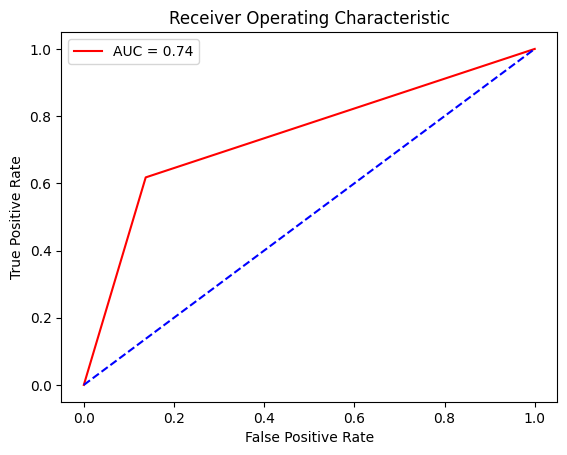

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       102
           1       0.75      0.62      0.68        68

    accuracy                           0.76       170
   macro avg       0.76      0.74      0.75       170
weighted avg       0.76      0.76      0.76       170



In [43]:
X=df.drop('survived',axis=1)
print(X.head())
y=df['survived']
X=pd.get_dummies(X,drop_first=True)
print(X.head())

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

from sklearn.metrics import auc,roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

import sklearn.metrics
print(sklearn.metrics.classification_report(y_test,y_pred))